<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23/blob/main/Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Test file for github

x = ' Hello World'


import pandas as pd
#
var_list = ['happy', 'hapunhap','relig','attend', 'relig16','age','income'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
# Cleaning attend
df = pd.read_csv("/content/selected_gss_data.csv")
print(df.shape)
print(df.head())
print(df['attend'].describe())
print(df['attend'].unique())
print(df['attend'].value_counts())

# Looks pretty good already

In [ ]:
# Cleaning relig16
print(df['relig16'].describe())
print(df['relig16'].unique())
print(df['relig16'].value_counts())

# Looks pretty good
# Rename for clarity
df = df.rename(columns = {'relig16':'relig_fam'})


In [ ]:
# Cleaning age
print(df['age'].describe())
print(df['age'].unique())
print(df['age'].value_counts())
print(df['age'].dtype)

# Looks pretty good
# Cast as int to make it cleaner
df['age'] = df['age'].astype('Int64')

print(df['age'].dtype)


In [ ]:
#Cleaning happy
print(df.shape)
print(df['happy'].describe())
print(df['happy'].unique())
print(df['happy'].value_counts())
print( 'Total missing: ', sum( df['happy'].isnull() ) )

df = df.dropna(subset=['happy'])
print(df['happy'].describe())

In [ ]:
print(df['hapunhap'].describe())
print(df['hapunhap'].unique())
print(df['hapunhap'].value_counts())
print( 'Total missing: ', sum( df['hapunhap'].isnull() ) )
#19,434 missing values ... might not want to use.


In [ ]:
print(df['income'].describe())
print(df['income'].unique())
print(df['income'].value_counts())
print( 'Total missing: ', sum( df['income'].isnull() ) )
df = df.dropna(subset=['income'])
print( 'Total missing: ', sum( df['income'].isnull() ) )


In [ ]:
# making visualization and further cleaning:
import seaborn as sns

# renaming the religions so they fit in axis
df['relig'] = df['relig'].replace('protestant', 'prot')
df['relig'] = df['relig'].replace('catholic', 'cath')
df['relig'] = df['relig'].replace('jewish', 'jew')
df['relig'] = df['relig'].replace('muslim', 'mus')
df['relig'] = df['relig'].replace('native american', 'indig')
df['relig'] = df['relig'].replace('other eastern religions', 'other')
df['relig'] = df['relig'].replace('christian', 'christ')
df['relig'] = df['relig'].replace('inter-nondenominational', 'christ')
df['relig'] = df['relig'].replace('hinduism', 'hind')
df['relig'] = df['relig'].replace('orthodox-christian', 'christ')
df['relig'] = df['relig'].replace('buddhism', 'bud')
df['relig'] = df['relig'].replace('muslim/islam', 'mus')
df = df[df['relig'] != 'relig'] # removes observations where 'relig' was listed as the person's religion




print(df['relig'])
df['relig'].describe()

sns.histplot(df['relig'], color='lime')

Bar graph of frequency of religions
(we don't have to keep this one)

In [ ]:
#add a column from relig that describes if the person is religious or not
df['relig_yn'] = df['relig'].apply(lambda x: 'no' if x == 'none' else 'yes')

In [ ]:
# clean relig_fam
df['relig_fam'] = df['relig_fam'].replace('protestant', 'prot')
df['relig_fam'] = df['relig_fam'].replace('catholic', 'cath')
df['relig_fam'] = df['relig_fam'].replace('jewish', 'jew')
df['relig_fam'] = df['relig_fam'].replace('muslim', 'mus')
df['relig_fam'] = df['relig_fam'].replace('native american', 'indig')
df['relig_fam'] = df['relig_fam'].replace('other eastern religions', 'other')
df['relig_fam'] = df['relig_fam'].replace('christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('inter-nondenominational', 'christ')
df['relig_fam'] = df['relig_fam'].replace('hinduism', 'hind')
df['relig_fam'] = df['relig_fam'].replace('orthodox-christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('buddhism', 'bud')
df['relig_fam'] = df['relig_fam'].replace('muslim/islam', 'mus')
df = df[df['relig_fam'] != 'relig'] # removes observations where 'relig' wa

df.head()

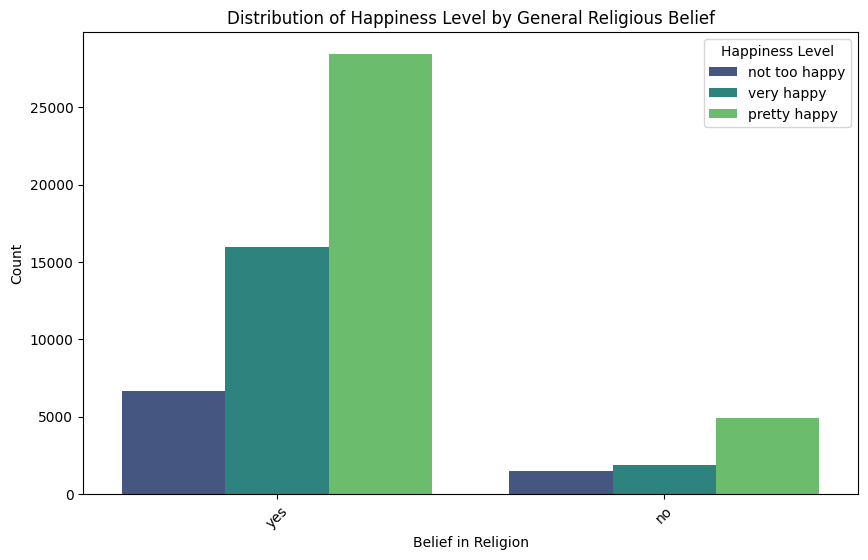

In [62]:
#count plot of happiness level by religious yes or no
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relig_yn', hue='happy', palette='viridis')
plt.title('Distribution of Happiness Level by General Religious Belief')
plt.xlabel('Belief in Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Happiness Level')
plt.show()

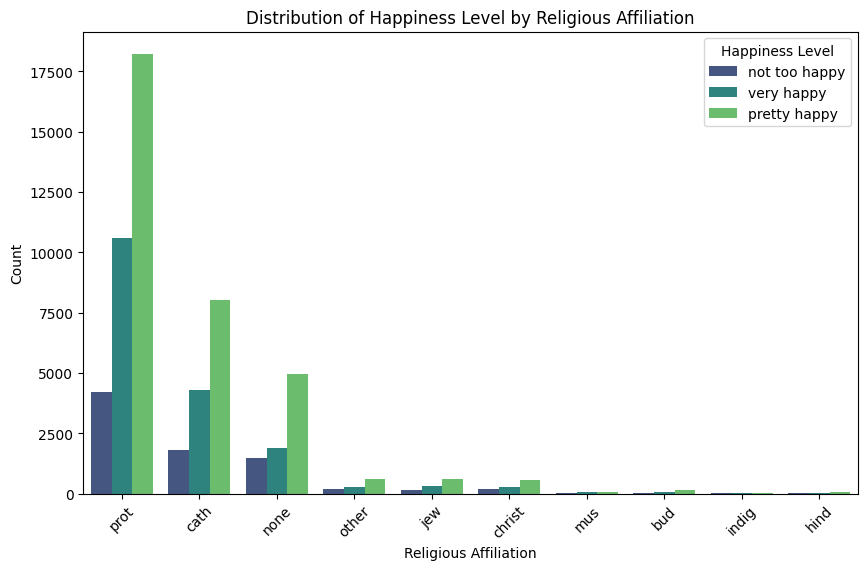

In [54]:
#count plot of happiness level by religious affiliation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relig', hue='happy', palette='viridis')
plt.title('Distribution of Happiness Level by Religious Affiliation')
plt.xlabel('Religious Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Happiness Level')
plt.show()